<h1>Mental Health in Tech predictions</h1>

<h2>Imports</h2>

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# PreProcessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.preprocessing import MinMaxScaler
from category_encoders import BinaryEncoder

# Splitting Data
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, plot_roc_curve
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier

# Tuning
from sklearn.model_selection import GridSearchCV

import pickle

Features used:

- Age
    - (numeric)
- Gender
    - (categorical: Male, Female)
- Self Employed: Are you self-employed?
    - (categorical: Yes, No)
- Family History: Do you have a family history of mental illness?
    - (categorical: Yes, No)
- Work Interfere: If you have a mental health condition, do you feel that it interferes with your work?
    - (categorical: Often, Sometimes, Rarely, Never)
- Employee Numbers: How many employees does your company or organization have?
    - (categorical: 1-5, 6-25, 26-100, 100-500, 500-1000, More than 1000)
- Remote Work: Do you work remotely (outside of an office) at least 50% of the time?
    - (categorical: Yes, No)
- Tech Company: Is your employer primarily a tech company/organization?
    - (categorical: Yes, No)
- Benefits: Does your employer provide mental health benefits?
    - (categorical: Yes, No, Don't know)
- Care Options: Do you know the options for mental health care your employer provides?
    - (categorical: Yes, No, Not Sure)
- Wellness Program: Has your employer ever discussed mental health as part of an employee wellness program?
    - (categorical: Yes, No, Don't know)
- Seek Help: Does your employer provide resources to learn more about mental health issues and how to seek help?
    - (categorical: Yes, No, Don't know)
- Anonymity: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?
    - (categorical: Yes, No, Don't know)
- Medical Leave: How easy is it for you to take medical leave for a mental health condition?
    - (categorical: Very easy, Somewhat easy, Don't know, Somewhat difficult, Very difficult)
- Mental Health Consequence: Do you think that discussing a mental health issue with your employer would have negative consequences?
    - (categorical: Yes, No, Maybe)
- Physical Health Consequence: Do you think that discussing a physical health issue with your employer would have negative consequences?
    - (categorical: Yes, No, Maybe)
- Coworkers: Would you be willing to discuss a mental health issue with your coworkers?
    - (categorical: Yes, No, Some of them)
- Supervisor: Would you be willing to discuss a mental health issue with your direct supervisor(s)?
    - (categorical: Yes, No, Some of them)
- Mental Health Interview: Would you bring up a mental health issue with a potential employer in an interview?
    - (categorical: Yes, No, Maybe)
- Physical Health Interview: Would you bring up a physical health issue with a potential employer in an interview?
    - (categorical: Yes, No, Maybe)
- Mental VS Physical: Do you feel that your employer takes mental health as seriously as physical health?
    - (categorical: Yes, No, Don't know)
- Observed Consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?
    - (categorical: Yes, No)

In [2]:
mh = pd.read_csv('survey.csv')
mh

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [3]:
mh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

<h2>Data Cleaning</h2>

Missing data

In [4]:
mh.isna().sum()/len(mh.index)*100

Timestamp                     0.000000
Age                           0.000000
Gender                        0.000000
Country                       0.000000
state                        40.905481
self_employed                 1.429706
family_history                0.000000
treatment                     0.000000
work_interfere               20.969023
no_employees                  0.000000
remote_work                   0.000000
tech_company                  0.000000
benefits                      0.000000
care_options                  0.000000
wellness_program              0.000000
seek_help                     0.000000
anonymity                     0.000000
leave                         0.000000
mental_health_consequence     0.000000
phys_health_consequence       0.000000
coworkers                     0.000000
supervisor                    0.000000
mental_health_interview       0.000000
phys_health_interview         0.000000
mental_vs_physical            0.000000
obs_consequence          

**Drop Columns**

- Drop Timestamp column because it's contains date, month, year and time the respondent took this questionnaire, which is irrelevant.
- Drop Country column because it's contained with the country where respondents live and 60% of answer in domination in 1 country. This column becomes irrelevant to the prediction model.
- Drop state column because it's only filled if the respondent lives in the US state, which means other respondents outside the US don't have any state ID and become missing values with 40% of data.
- Drop comments column because almost 70% of data is missing. It was an optional text box so it's reasonable to expect that many (most) respondents would leave it blank.

In [5]:
mh.drop(columns=['Timestamp', 'Country', 'state', 'comments'], inplace = True)

**Rename Columns**

In [6]:
mh.rename({'self_employed' : 'Self_Employed', 'family_history' : 'Family_History', 
           'treatment' : 'Treatment', 'work_interfere' : 'Work_Interfere', 
           'no_employees': 'Employee_Numbers', 'remote_work': 'Remote_Work', 'tech_company': 'Tech_Company', 
           'benefits': 'Benefits', 'care_options': 'Care_Options', 'wellness_program': 'Wellness_Program', 
           'seek_help': 'Seek_Help', 'anonymity': 'Anonymity', 'leave': 'Medical_Leave', 
           'mental_health_consequence': 'Mental_Health_Consequence', 
           'phys_health_consequence': 'Physical_Health_Consequence', 'coworkers': 'Coworkers', 
           'supervisor': 'Supervisor', 'mental_health_interview': 'Mental_Health_Interview', 
           'phys_health_interview': 'Physical_Health_Interview', 'mental_vs_physical': 'Mental_VS_Physical', 
           'obs_consequence': 'Observed_Consequence'} , inplace = True , axis = 1)

**Feature value checking**

- Minimum age 15, change the incorrect age values into nan
- Categorise the gender columns into 3 distinc values (male, female, queer)

In [7]:
mh['Age'].unique()

array([         37,          44,          32,          31,          33,
                35,          39,          42,          23,          29,
                36,          27,          46,          41,          34,
                30,          40,          38,          50,          24,
                18,          28,          26,          22,          19,
                25,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,           8,
                11,          -1,          72], dtype=int64)

In [8]:
mh['Age'].replace([mh['Age'][mh['Age'] < 15]], np.nan, inplace = True)
mh['Age'].replace([mh['Age'][mh['Age'] > 100]], np.nan, inplace = True)

mh['Age'].unique()

array([37., 44., 32., 31., 33., 35., 39., 42., 23., 29., 36., 27., 46.,
       41., 34., 30., 40., 38., 50., 24., 18., 28., 26., 22., 19., 25.,
       45., 21., nan, 43., 56., 60., 54., 55., 48., 20., 57., 58., 47.,
       62., 51., 65., 49., 53., 61., 72.])

In [9]:
mh['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [10]:
mh['Gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male',
                     'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
                      'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make',], 'Male', inplace = True)

mh['Gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female',
                     'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)',
                     'woman',], 'Female', inplace = True)

mh["Gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary',
                     'fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
                      'Agender', 'A little about you', 'Nah', 'All',
                      'ostensibly male, unsure what that really means',
                      'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?',
                      'Guy (-ish) ^_^', 'Trans woman',], 'Queer', inplace = True)

In [11]:
mh['Gender'].value_counts()

Male      991
Female    247
Queer      21
Name: Gender, dtype: int64

<h2>EDA</h2>

In [12]:
mh_eda = mh.copy()

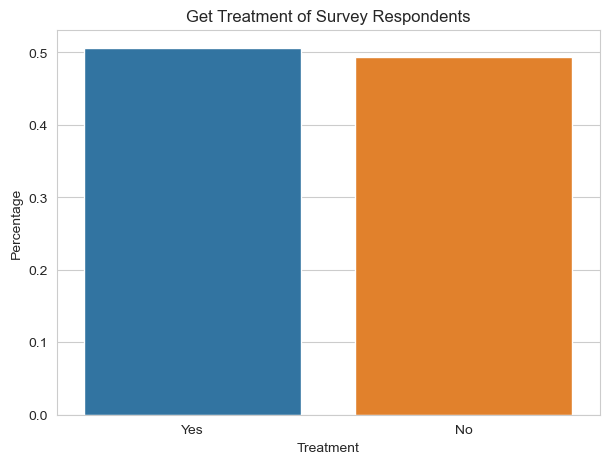

In [13]:
sns.set_style("whitegrid")
plt.figure(figsize = (7,5))
eda_percentage = mh_eda['Treatment'].value_counts(normalize = True).rename_axis('Treatment').reset_index(name = 'Percentage')
sns.barplot(x = 'Treatment', y = 'Percentage', data = eda_percentage.head(10))
plt.title('Get Treatment of Survey Respondents')
plt.show()

This is the respondents result of question, **'Have you get treatment for a mental health condition?'**.

<h2>Profile of respondents</h2>

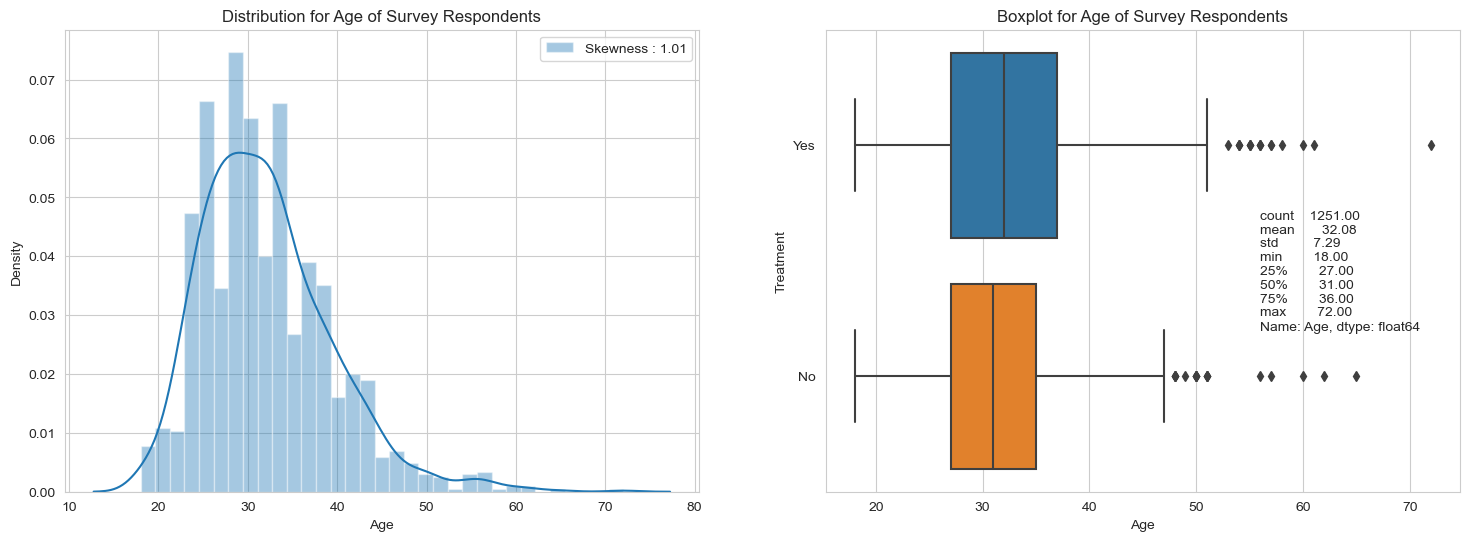

In [14]:
plt.figure(figsize = (18,6))
plt.subplot(1,2,1)
sns.distplot(mh_eda['Age'], label = 'Skewness : %.2f'%(mh_eda['Age'].skew()))
plt.legend(loc = 0, fontsize = 10)
plt.title('Distribution for Age of Survey Respondents')
plt.subplot(1,2,2)
sns.boxplot(x = "Age", y = "Treatment", data = mh_eda)
plt.title('Boxplot for Age of Survey Respondents')
age = str(mh_eda['Age'].describe().round(2))
plt.text(56, 0.80, age)
plt.show()

- It's indicated that most of the employees that fill the survey around the end 20s to early 40s. I assume that they on between mid to senior-level positions. The distribution of ages is right-skewed which is expected as the **tech industry tends to have younger employees**.

- From the boxplot, there is no statistically significant difference of ages between respondents that get treatment and no treatment.

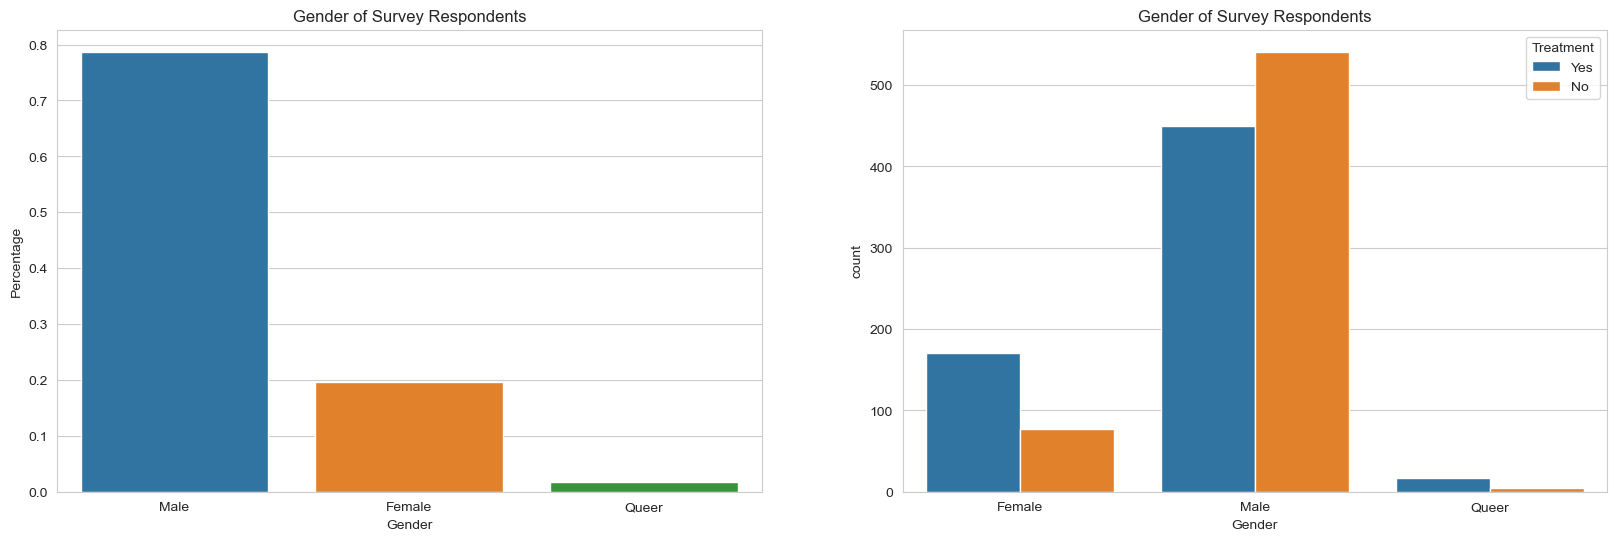

In [15]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
eda_percentage = mh_eda['Gender'].value_counts(normalize = True).rename_axis('Gender').reset_index(name = 'Percentage')
sns.barplot(x = 'Gender', y = 'Percentage', data = eda_percentage.head(10))
plt.title('Gender of Survey Respondents')
plt.subplot(1,2,2)
sns.countplot(mh_eda['Gender'], hue = mh_eda['Treatment'])
plt.title('Gender of Survey Respondents')
plt.show()

- **Almost 79% of respondents are male**, not surprisingly, especially in the tech field. The very large gap between men and women causes higher competitive pressure for women than men. Based on the plot, female that want to get treatment is high around 70%.
- There is a Queer entry of less than 2%. Although the percentage of queer is very low, it still deserves to dig out some new insights. For example, such a small proportion can show a significant difference in the count of who wants the treatments.

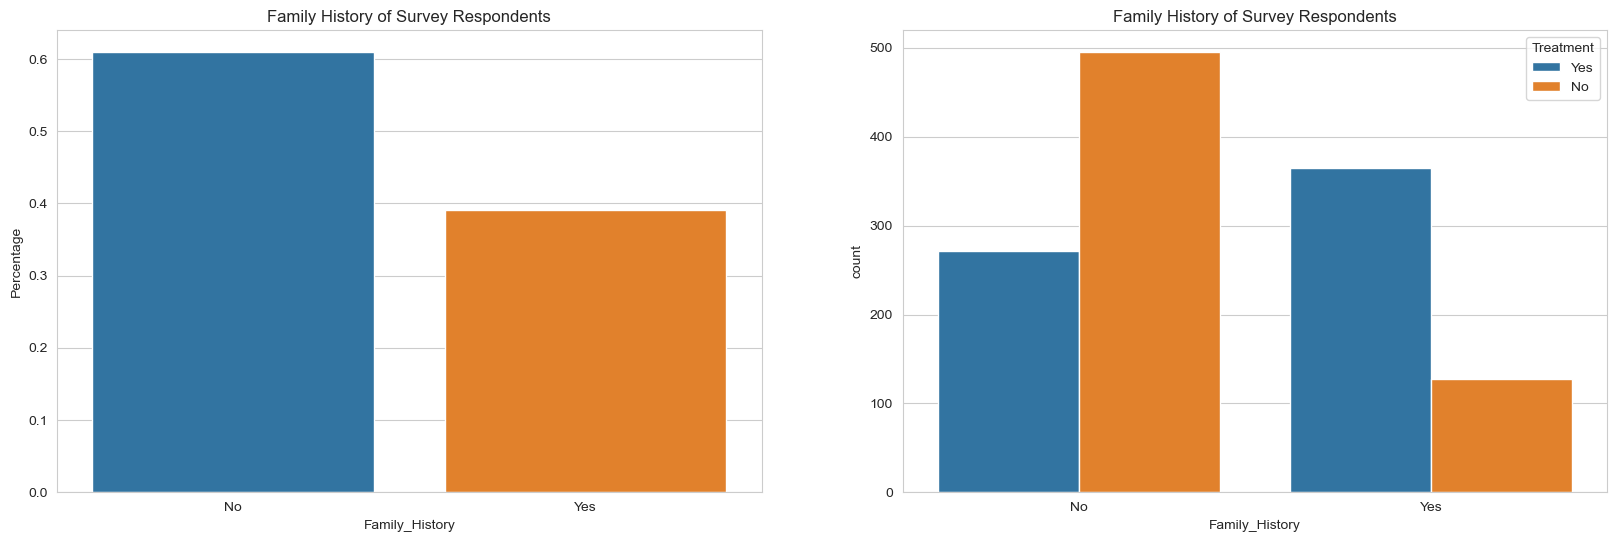

In [16]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
eda_percentage = mh_eda['Family_History'].value_counts(normalize = True).rename_axis('Family_History').reset_index(name = 'Percentage')
sns.barplot(x = 'Family_History', y = 'Percentage', data = eda_percentage)
plt.title('Family History of Survey Respondents')
plt.subplot(1,2,2)
sns.countplot(mh_eda['Family_History'], hue = mh_eda['Treatment'])
plt.title('Family History of Survey Respondents')
plt.show()

- From 40% of respondents who say that they have a family history of mental illness, the plot shows that they significantly want to get treatment rather than without a family history. This is acceptable, remember the fact that people with a family history pay more attention to mental illness. Family history is a significant risk factor for many mental health disorders.

<h2>
Work Environment of Respondents</h2>

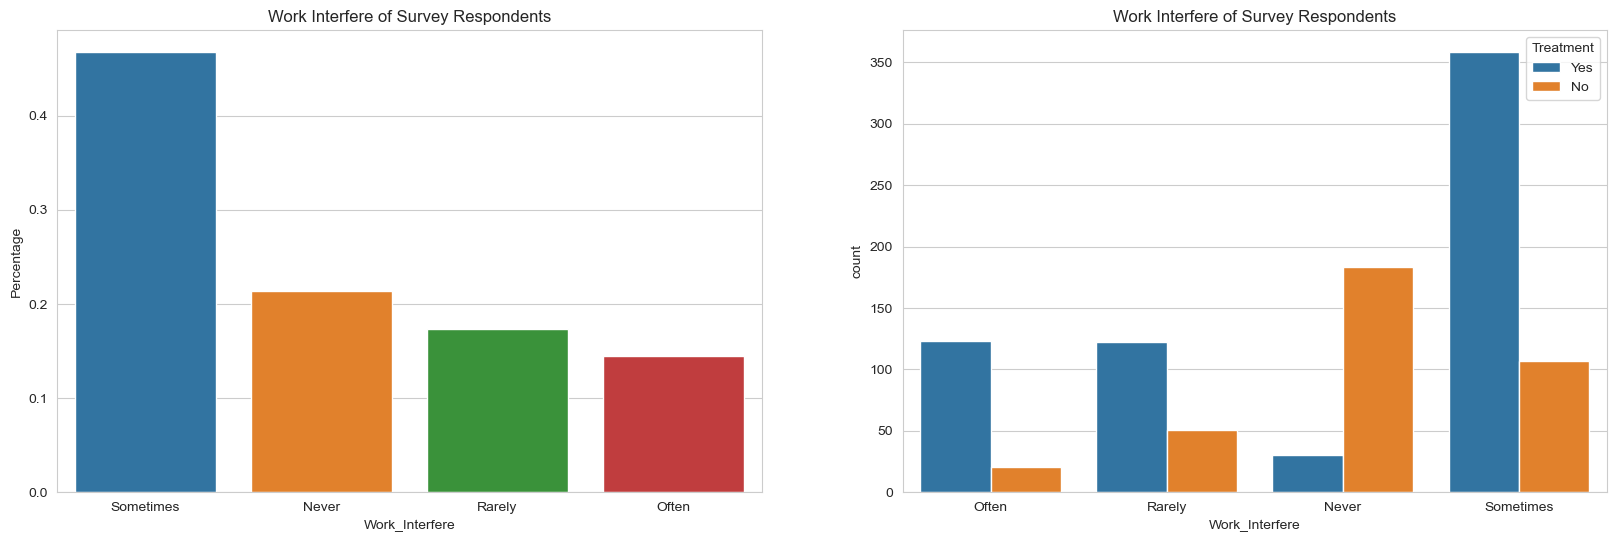

In [17]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
eda_percentage = mh_eda['Work_Interfere'].value_counts(normalize = True).rename_axis('Work_Interfere').reset_index(name = 'Percentage')
sns.barplot(x = 'Work_Interfere', y = 'Percentage', data = eda_percentage)
plt.title('Work Interfere of Survey Respondents')
plt.subplot(1,2,2)
sns.countplot(mh_eda['Work_Interfere'], hue = mh_eda['Treatment'])
plt.title('Work Interfere of Survey Respondents')
plt.show()

- This is the respondents result of question, **'If you have a mental health condition, do you feel that it interferes with your work?'**.
- About 78% of respondents have experienced interference at work with a ratio of rarely, sometimes, and frequently.

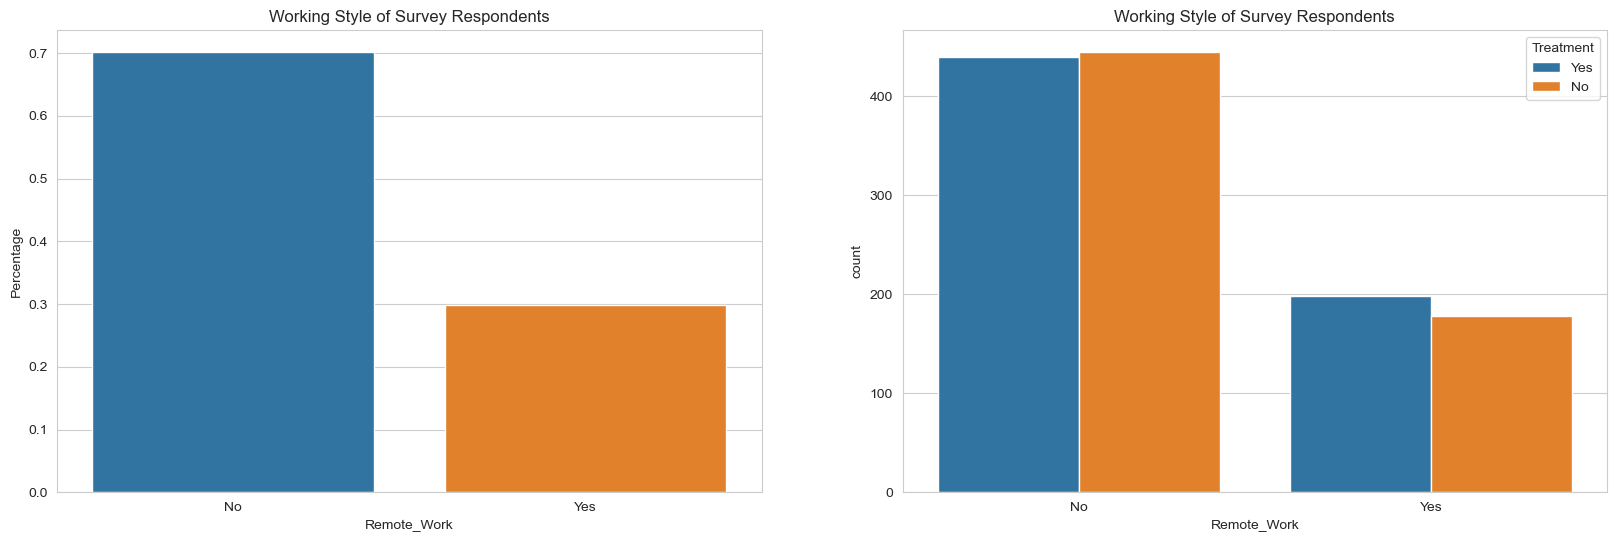

In [18]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
eda_percentage = mh_eda['Remote_Work'].value_counts(normalize = True).rename_axis('Remote_Work').reset_index(name = 'Percentage')
sns.barplot(x = 'Remote_Work', y = 'Percentage', data = eda_percentage)
plt.title('Working Style of Survey Respondents')
plt.subplot(1,2,2)
sns.countplot(mh_eda['Remote_Work'], hue = mh_eda['Treatment'])
plt.title('Working Style of Survey Respondents')
plt.show()

- This is the respondents result of question, **'Do you work remotely (outside of an office) at least 50% of the time?'**.
- No significant data can be gathered from these graphs

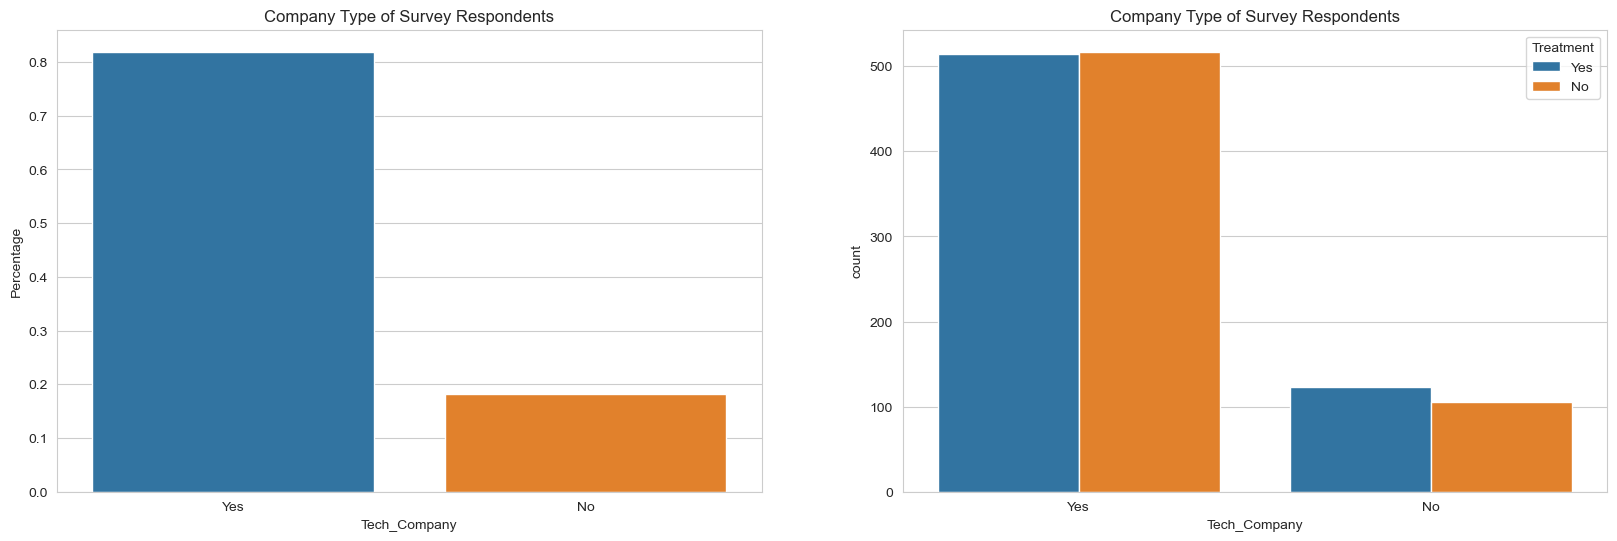

In [19]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
eda_percentage = mh_eda['Tech_Company'].value_counts(normalize = True).rename_axis('Tech_Company').reset_index(name = 'Percentage')
sns.barplot(x = 'Tech_Company', y = 'Percentage', data = eda_percentage)
plt.title('Company Type of Survey Respondents')
plt.subplot(1,2,2)
sns.countplot(mh_eda['Tech_Company'], hue = mh_eda['Treatment'])
plt.title('Company Type of Survey Respondents')
plt.show()

- Seems that people that work outside of tech companies want treatmeant more than the ones that work in tech companies. Very slight difference.

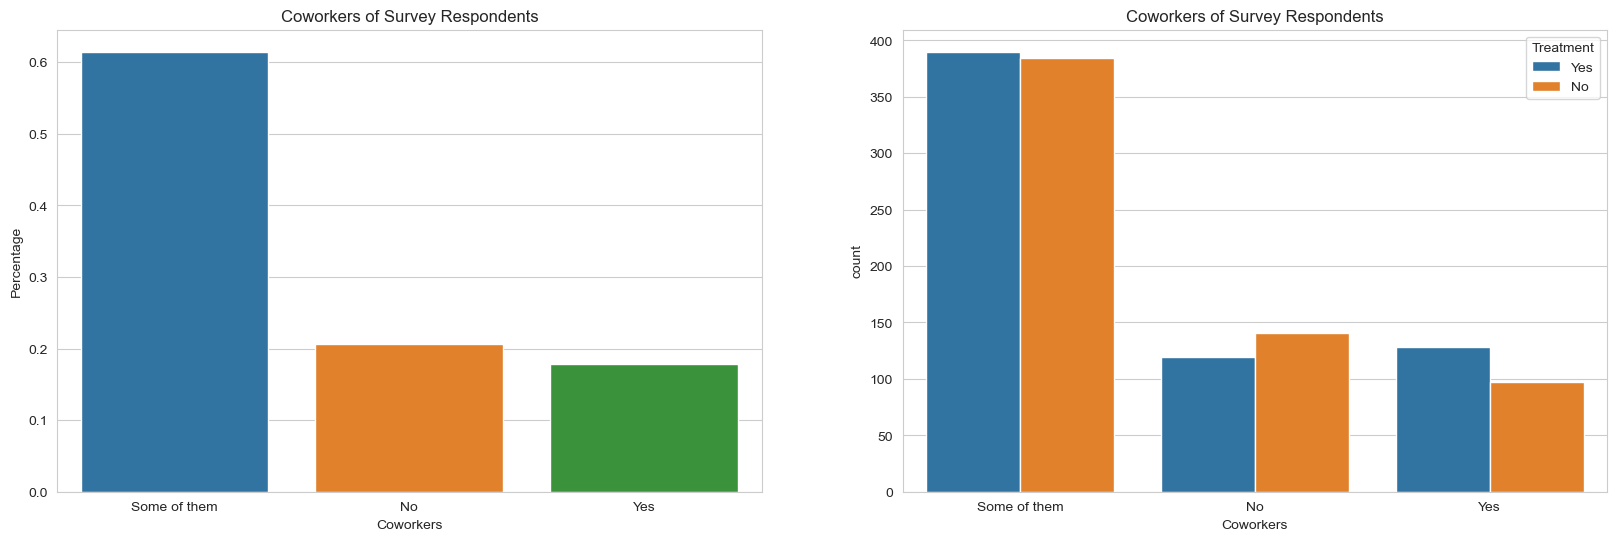

In [20]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
eda_percentage = mh_eda['Coworkers'].value_counts(normalize = True).rename_axis('Coworkers').reset_index(name = 'Percentage')
sns.barplot(x = 'Coworkers', y = 'Percentage', data = eda_percentage)
plt.title('Coworkers of Survey Respondents')
plt.subplot(1,2,2)
sns.countplot(mh_eda['Coworkers'], hue = mh_eda['Treatment'])
plt.title('Coworkers of Survey Respondents')
plt.show()

- This is the respondents result of question, **'Would you be willing to discuss a mental health issue with your coworkers?'**.
- From 18% of respondents who say yes to discuss it with coworkers, 60% of them want to get treatment.
- About 60% of respondents decide to discuss some of them with coworkers. Employees who do that and want to get treatment are half of them. Let's see if the respondent will discuss it with a supervisor or not.

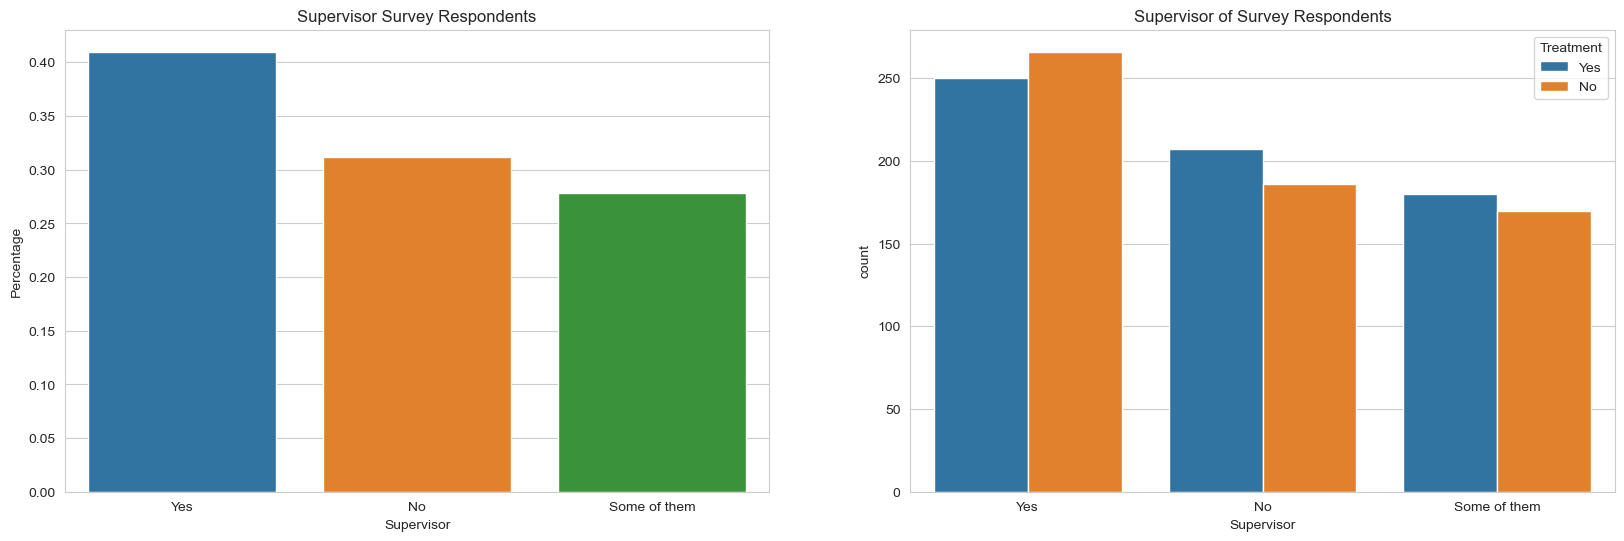

In [21]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
eda_percentage = mh_eda['Supervisor'].value_counts(normalize = True).rename_axis('Supervisor').reset_index(name = 'Percentage')
sns.barplot(x = 'Supervisor', y = 'Percentage', data = eda_percentage)
plt.title('Supervisor Survey Respondents')
plt.subplot(1,2,2)
sns.countplot(mh_eda['Supervisor'], hue = mh_eda['Treatment'])
plt.title('Supervisor of Survey Respondents')
plt.show()

- This is the respondents result of question, **'Would you be willing to discuss a mental health issue with your direct supervisor(s)?'**.
- From 40% of respondents who say yes to discuss with supervisor, only 55% of them that want to get treatment. I think maybe talking to someone in a higher position could help relief the issues.

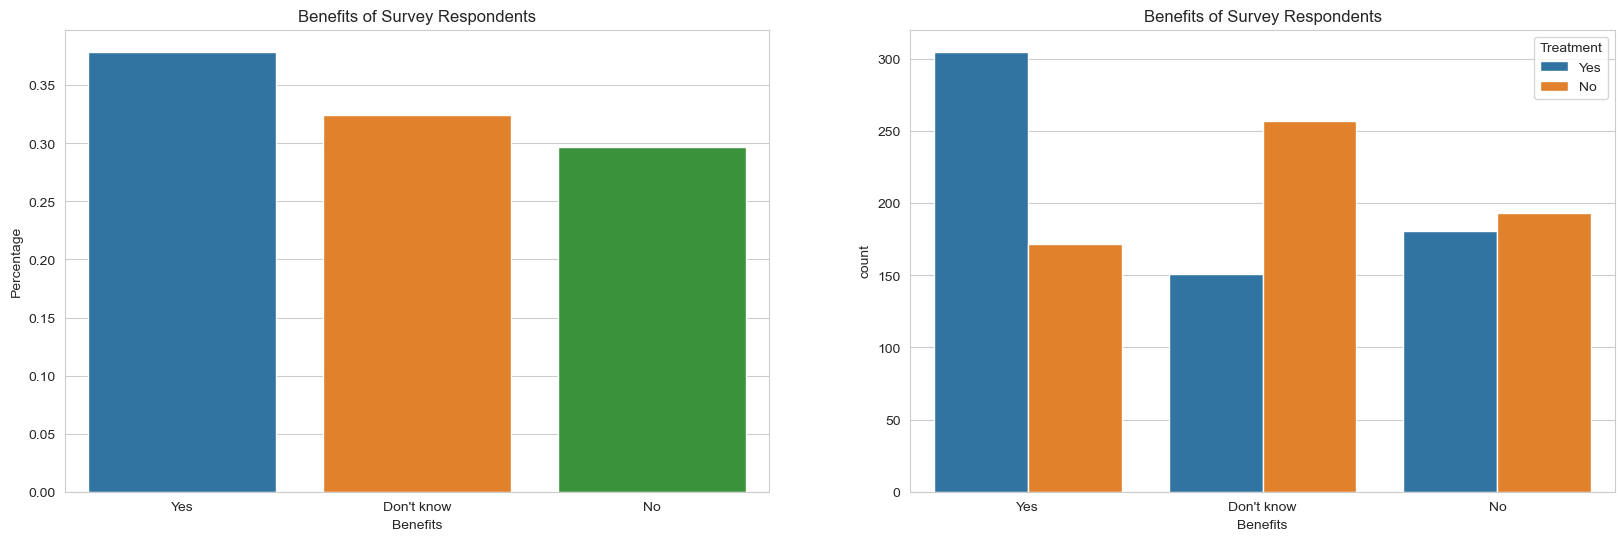

In [22]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
eda_percentage = mh_eda['Benefits'].value_counts(normalize = True).rename_axis('Benefits').reset_index(name = 'Percentage')
sns.barplot(x = 'Benefits', y = 'Percentage', data = eda_percentage)
plt.title('Benefits of Survey Respondents')
plt.subplot(1,2,2)
sns.countplot(mh_eda['Benefits'], hue = mh_eda['Treatment'])
plt.title('Benefits of Survey Respondents')
plt.show()

- This is the respondents result of question, **'Does your employer provide mental health benefits?'**.
- Only 35% of respondents know about mental health benefits that the company provides for them.
- For employees who know the benefits, almost 60% of the employees want to get treatment. 

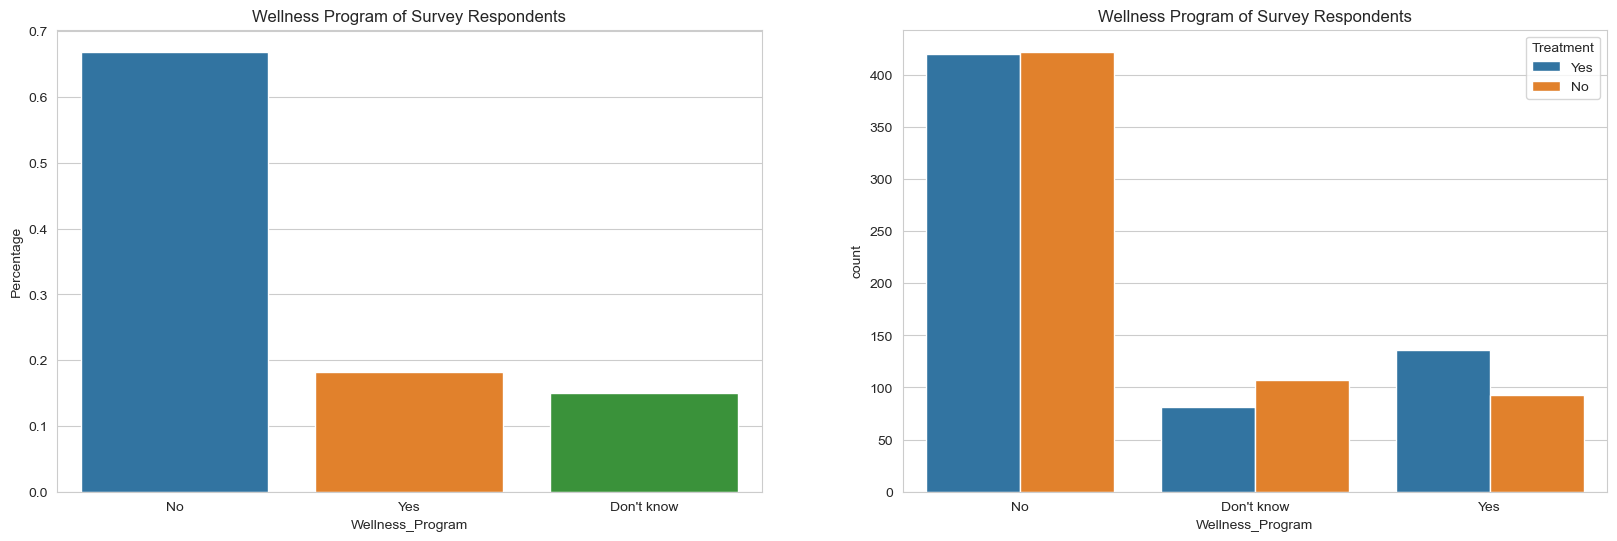

In [23]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
eda_percentage = mh_eda['Wellness_Program'].value_counts(normalize = True).rename_axis('Wellness_Program').reset_index(name = 'Percentage')
sns.barplot(x = 'Wellness_Program', y = 'Percentage', data = eda_percentage)
plt.title('Wellness Program of Survey Respondents')
plt.subplot(1,2,2)
sns.countplot(mh_eda['Wellness_Program'], hue = mh_eda['Treatment'])
plt.title('Wellness Program of Survey Respondents')
plt.show()

- This is the respondents result of question, **'Has your employer ever discussed mental health as part of an employee wellness program?'**.
- About 19% of the repondents say yes about become a part of employee wellness program and 60% of employee want to get treatment.
- More than 65% of respondents say that there aren't any wellness programs that provide by their company. But half of the respondents want to get treatment, which means the company need to provide it soon.

<h2>EDA Conclussion</h2>

Nearly 86% of employees report improved work performance and lower rates of absenteeism after receiving treatment for depression, according to an April 2018 article in the Journal of Occupational and Environmental Medicine. This means big gains in retention and productivity for employers. By providing employees access to mental health benefits, the company can begin to create a culture of understanding and compassion at the tech company. And having employees who feel cared for and happy isn’t just good, it’s good business.

- Companies must know the gender and family history greatly influence the decision to get treatment for employees. So if the company wants to provide more support, the company must make an assessment of the employee's personality because different characters can determine different needs. Age can also be a trigger, considering that most of them are young so there is a high chance that they will be open-minded to get treatment.

- Companies should consider providing facilities to anticipate job stress on employees. Some of the companies decide to make a private room or silent room in case employees suddenly feel stress and need a private moment.

- The company needs to provide a good benefits for employees so they can maintain their mental health. 

<h2>Preprocessing</h2>

In [24]:
mode_onehot_pipe = Pipeline([
    ('encoder', SimpleImputer(strategy = 'most_frequent')),
    ('one hot encoder', OneHotEncoder(handle_unknown = 'ignore'))])

transformer = ColumnTransformer([
    ('one hot', OneHotEncoder(handle_unknown = 'ignore'), ['Gender', 'Family_History', 'Employee_Numbers',
                                                           'Remote_Work', 'Tech_Company', 'Benefits', 'Care_Options',
                                                           'Wellness_Program', 'Seek_Help', 'Anonymity',
                                                           'Medical_Leave', 'Mental_Health_Consequence',
                                                           'Physical_Health_Consequence', 'Coworkers', 'Supervisor',
                                                           'Mental_Health_Interview', 'Physical_Health_Interview',
                                                           'Mental_VS_Physical', 'Observed_Consequence']),
    ('mode_onehot_pipe', mode_onehot_pipe, ['Self_Employed', 'Work_Interfere']),
    ('iterative', IterativeImputer(max_iter = 10, random_state = 0), ['Age'])])

In [25]:
mh['Treatment'].value_counts()/mh.shape[0]*100

Yes    50.595711
No     49.404289
Name: Treatment, dtype: float64

In [26]:
mh['Treatment'] = np.where(mh['Treatment'] == 'Yes', 1, 0)

0 = No Treatment

1 = Get Treatment

- TN: Employee's Mental Health predict with No Treatment and the actual is No Treatment
- TP: Employee's Mental Health predict with Get Treatment and the actual is Get Treatment
- FP: Employee's Mental Health predict with Get Treatment and the actual is No Treatment
- FN: Employee's Mental Health predict with No Treatment and the actual is Get Treatment

Actions:

- FN: There is a feeling of excessive stress and anxiety at work. It's not detected in employees do their work performance decreases due to prediction errors.

- FP: It would be nice if the company provides mental health treatment to them so that employees can maintain mental health at the workplace.

In [27]:
X = mh.drop('Treatment', axis = 1)
y = mh['Treatment']

In [28]:
X.shape

(1259, 22)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   stratify = y,
                                                    test_size = 0.3,
                                                   random_state = 2222)

<h2>Modelling</h2>

- Basic models:

    - Logistic Regression (logreg)
    - Decision Tree Classifier (tree)
    - K-Nearest Neighbor (knn)

- Ensemble models:

    - Random Forest Classifier (rf)
    - Ada Boost Classifier (ada)
    - Gradient Boosting Classifier (grad)
    - XGB Classifier (xgboost)



In [30]:
logreg = LogisticRegression()
tree = DecisionTreeClassifier(random_state = 2222)
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state = 2222)
ada = AdaBoostClassifier(random_state = 2222)
grad = GradientBoostingClassifier(random_state = 2222)
xgboost = XGBClassifier(random_state = 2222)

In [31]:
logreg_pipe = Pipeline([('transformer', transformer), ('logreg', logreg)])
tree_pipe = Pipeline([('transformer', transformer), ('tree', tree)])
knn_pipe = Pipeline([('transformer', transformer), ('knn', knn)])
rf_pipe = Pipeline([('transformer', transformer), ('rf', rf)])
ada_pipe = Pipeline([('transformer', transformer), ('ada', ada)])
grad_pipe = Pipeline([('transformer', transformer), ('grad', grad)])
xgb_pipe = Pipeline([('transformer', transformer), ('xgboost', xgboost)])

def model_evaluation(model, metric):
    model_cv = cross_val_score(model, X_train, y_train, cv = StratifiedKFold(n_splits = 5), scoring = metric)
    return model_cv

logreg_pipe_cv = model_evaluation(logreg_pipe, 'recall')
tree_pipe_cv = model_evaluation(tree_pipe, 'recall')
knn_pipe_cv = model_evaluation(knn_pipe, 'recall')
rf_pipe_cv = model_evaluation(rf_pipe, 'recall')
ada_pipe_cv = model_evaluation(ada_pipe, 'recall')
grad_pipe_cv = model_evaluation(grad_pipe, 'recall')
xgb_pipe_cv = model_evaluation(xgb_pipe, 'recall')

for model in [logreg_pipe, tree_pipe, knn_pipe, rf_pipe, ada_pipe, grad_pipe, xgb_pipe]:
    model.fit(X_train, y_train)

score_cv = [logreg_pipe_cv.round(5), tree_pipe_cv.round(5), knn_pipe_cv.round(5),
            rf_pipe_cv.round(5), ada_pipe_cv.round(5), grad_pipe_cv.round(5), xgb_pipe_cv.round(5)]
score_mean = [logreg_pipe_cv.mean(), tree_pipe_cv.mean(), knn_pipe_cv.mean(), rf_pipe_cv.mean(),
              ada_pipe_cv.mean(), grad_pipe_cv.mean(), xgb_pipe_cv.mean()]
score_std = [logreg_pipe_cv.std(), tree_pipe_cv.std(), knn_pipe_cv.std(), rf_pipe_cv.std(),
             ada_pipe_cv.std(), grad_pipe_cv.std(), xgb_pipe_cv.std()]
score_recall_score = [recall_score(y_test, logreg_pipe.predict(X_test)),
            recall_score(y_test, tree_pipe.predict(X_test)), 
            recall_score(y_test, knn_pipe.predict(X_test)), 
            recall_score(y_test, rf_pipe.predict(X_test)),
            recall_score(y_test, ada_pipe.predict(X_test)),
            recall_score(y_test, grad_pipe.predict(X_test)),
            recall_score(y_test, xgb_pipe.predict(X_test))]
method_name = ['Logistic Regression', 'Decision Tree Classifier', 'KNN Classifier', 'Random Forest Classifier',
               'Ada Boost Classifier', 'Gradient Boosting Classifier', 'XGB Classifier']
cv_summary = pd.DataFrame({
    'method': method_name,
    'cv score': score_cv,
    'mean score': score_mean,
    'std score': score_std,
    'recall score': score_recall_score
})
cv_summary

,method,cv score,mean score,std score,recall score
0,Logistic Regression,"[0.75556, 0.70787, 0.74157, 0.69663, 0.75281]",0.730886,0.024112,0.701571
1,Decision Tree Classifier,"[0.65556, 0.66292, 0.60674, 0.67416, 0.66292]",0.652459,0.023620,0.617801
2,KNN Classifier,"[0.52222, 0.60674, 0.52809, 0.59551, 0.60674]",0.571860,0.038399,0.570681
3,Random Forest Classifier,"[0.78889, 0.75281, 0.74157, 0.76404, 0.74157]",0.757778,0.017647,0.664921
4,Ada Boost Classifier,"[0.75556, 0.7191, 0.74157, 0.68539, 0.73034]",0.726392,0.023793,0.722513
5,Gradient Boosting Classifier,"[0.82222, 0.7191, 0.73034, 0.77528, 0.77528]",0.764444,0.036858,0.712042
6,XGB Classifier,"[0.77778, 0.70787, 0.73034, 0.74157, 0.76404]",0.744320,0.024660,0.691099


- From the cross validation process, there are 2 models that pop up with high precision scores. The first is Logistic Regression for the basic model and the second is Ada Boost Classifier for the ensemble model.

In [39]:
file_name = 'LogRegModel.pickle'

pickle.dump(logreg_pipe, open(file_name,'wb'))

In [40]:
loaded_model = pickle.load(open(file_name,'rb'))

In [48]:
mh_predict = pd.DataFrame({
    'Gender': ['Female'],
    'Age':[30],
    'Self_Employed': ['No'],
    'Family_History': ['Yes'],
    'Work_Interfere': ['Often'],
    'Employee_Numbers': ['100-500'],
    'Tech_Company': ['Yes'],
    'Benefits': ['Yes'],
    'Care_Options': ['Yes'],
    'Seek_Help': ['Yes'],
    'Anonymity': ['Yes'],
    'Remote_Work':['Yes'],
    'Wellness_Program':['Yes'],
    'Physical_Health_Consequence':['No'],
    'Medical_Leave': ['Somewhat easy'],
    'Mental_Health_Consequence': ['No'],
    'Coworkers': ['Some of them'],
    'Supervisor': ['Some of them'],
    'Mental_Health_Interview': ['No'],
    'Physical_Health_Interview': ['No'],
    'Mental_VS_Physical': ['No'],
    'Observed_Consequence': ['No']
})

In [49]:
mh_predict

,Gender,Age,Self_Employed,Family_History,Work_Interfere,Employee_Numbers,Tech_Company,Benefits,Care_Options,Seek_Help,...,Wellness_Program,Physical_Health_Consequence,Medical_Leave,Mental_Health_Consequence,Coworkers,Supervisor,Mental_Health_Interview,Physical_Health_Interview,Mental_VS_Physical,Observed_Consequence
0,Female,30,No,Yes,Often,100-500,Yes,Yes,Yes,Yes,...,Yes,No,Somewhat easy,No,Some of them,Some of them,No,No,No,No


In [50]:
loaded_model.predict(mh_predict)

array([1])